<a href="https://colab.research.google.com/github/neethittl/god/blob/master/face_webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality = 0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      
      
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      
      
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      
      
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      
      // Wait for the Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      
      
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }''')
  
  
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [5]:
from IPython.display import Image

import tensorflow as tf
import numpy as np
from PIL import Image
from io import StringIO 
from IPython.display import clear_output, Image as displayImage, display

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  img = Image.fromarray(filename)
  img.show()
  
  #im = Image.fromarray(filename)
  img.save("test.jpg")
  #Show the image which was just taken with the camera present.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a camera or webcam on their device
  # grant the page permission to access the avialable camera or webcam
  print(str(err))
 


<IPython.core.display.Javascript object>

Saved to photo.jpg
'str' object has no attribute '__array_interface__'


Faces found:  1


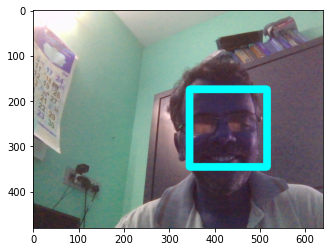

In [8]:
import cv2
#!pip install cvlib

import matplotlib.pyplot as plt
#import cvlib as cv

 
from google.colab import files 

#file=files.upload()

import numpy as np
 
 
 

test_image = cv2.imread(filename)
#plt.imshow(test_image)
 
#plt.show()





haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.1, minNeighbors =1);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 255), 15)

plt.imshow(test_image)

